# Basic K-NN with numpy only

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def euclidian_distances(a,b):
    return np.sqrt( np.sum((a-b)**2, axis=1) )

In [3]:
a = np.array([[3,3],[2,12],[5,6]])
b = np.array([[2,2],[4,5],[3,3]])
euclidian_distances(a,b)

array([1.41421356, 7.28010989, 3.60555128])

### Generate synthetic data

In [4]:
dims = 2 # nuber of dimensions in space
num_of_data = 40 # number of data points per flock

x1 = 3.2 * np.random.rand(num_of_data,dims) + 6
x2 = 3.2 * np.random.rand(num_of_data,dims) + 3
x3 = 3.2 * np.random.rand(num_of_data,dims)
x3[:,0] = x3[:,0] + 5
x4 = x3 + 3
x = np.concatenate((x1,x2,x3,x4),axis=0)

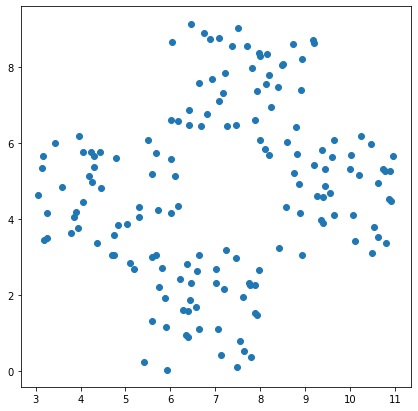

In [5]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(x[:,0],x[:,1])

### K-NN algorithm

In [6]:
K = 4 # number of kernels (hyper-parameter)

kernel_locs_prev = np.mean(x,axis=0) + (np.random.rand(K,dims)-0.5)*5
dists = np.zeros((x.shape[0],K))
for i in range(20):
    for k in range(K):
        dists[:,k] = euclidian_distances(kernel_locs_prev[k,:],x)
#     print(dists)
    k_class = np.argmin(dists, axis=1)
#         print(k_class)
    kernel_locs = np.zeros_like(kernel_locs_prev)
    for k in range(K):
        kernel_locs[k,:] = np.mean(x[k_class == k],axis=0)
#     print(kernel_locs)
    if np.sum(np.isnan(kernel_locs)) != 0:
        break
    if np.array_equal(kernel_locs,kernel_locs_prev):
        print('Num of iterations needed: %i' %i)
        break
    kernel_locs_prev = kernel_locs.copy()

Num of iterations needed: 3


### Plot classification results

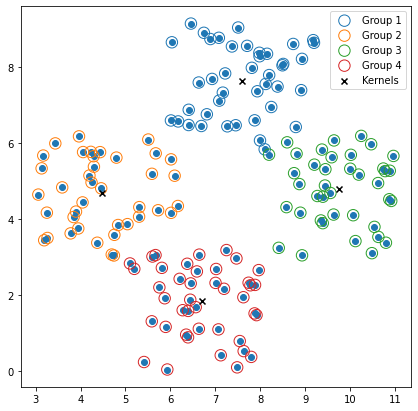

In [7]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(x[:,0],x[:,1])
for k in range(K):
    i=k+1
    temp_str = str('Group %i' %i)
    ax.scatter(x[k_class == k][:,0],
               x[k_class == k][:,1], 
               s=130, 
               edgecolor='C'+str(k), 
               facecolors='none', 
               label=temp_str)
ax.scatter(kernel_locs[:,0],
           kernel_locs[:,1], 
           c='k', 
           marker='x', 
           label='Kernels')
ax.legend()